In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats =  np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs =  np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates =  list(lat_lngs)

In [12]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [15]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f57dffac2413e19cf3aa05fd02a68e90


In [16]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chipinge
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | port hedland
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | lorengau
Processing Record 7 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 8 of Set 1 | prieska
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | airai
Processing Record 13 of Set 1 | tuatapere
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | iracoubo
Processing Record 16 of Set 1 | saleaula
City not found. Skipping...
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | westport
Processing Record 19 of Set 1 | el tigre
Processing Record 20 of Set 1 | adrar
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of S

Processing Record 38 of Set 4 | itapetininga
Processing Record 39 of Set 4 | hualmay
Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | salinopolis
Processing Record 42 of Set 4 | hobyo
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | hanzhong
Processing Record 45 of Set 4 | kampene
Processing Record 46 of Set 4 | luancheng
Processing Record 47 of Set 4 | santa rita do sapucai
Processing Record 48 of Set 4 | naze
Processing Record 49 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 50 of Set 4 | gondar
Processing Record 1 of Set 5 | aliwal north
Processing Record 2 of Set 5 | stromness
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | lebu
Processing Record 5 of Set 5 | esperance
Processing Record 6 of Set 5 | hare bay
Processing Record 7 of Set 5 | klembivka
Processing Record 8 of Set 5 | the valley
Processing Record 9 of Set 5 | saint george
Processing Record 10 of Set 5 | liverpool
Processing Record 1

Processing Record 27 of Set 8 | innisfail
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | krasnomayskiy
Processing Record 30 of Set 8 | santa isabel do rio negro
Processing Record 31 of Set 8 | filingue
Processing Record 32 of Set 8 | ponta delgada
Processing Record 33 of Set 8 | dryden
Processing Record 34 of Set 8 | middlesbrough
Processing Record 35 of Set 8 | mozelos
Processing Record 36 of Set 8 | funadhoo
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | mandla
Processing Record 39 of Set 8 | plerin
Processing Record 40 of Set 8 | luderitz
Processing Record 41 of Set 8 | merida
Processing Record 42 of Set 8 | saint-georges
Processing Record 43 of Set 8 | mtambile
Processing Record 44 of Set 8 | kangavar
Processing Record 45 of Set 8 | zhezkazgan
Processing Record 46 of Set 8 | dawei
Processing Record 47 of Set 8 | santa maria del oro
Processing Record 48 of Set 8 | yelovo
Processing Record 49 of Set 8 | batagay
Processing Record 50 of Set 

Processing Record 14 of Set 12 | port antonio
Processing Record 15 of Set 12 | corrales
Processing Record 16 of Set 12 | brus laguna
Processing Record 17 of Set 12 | tautira
Processing Record 18 of Set 12 | yanam
Processing Record 19 of Set 12 | labrea
Processing Record 20 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 21 of Set 12 | teknaf
Processing Record 22 of Set 12 | udachnyy
Processing Record 23 of Set 12 | basar
Processing Record 24 of Set 12 | atchison
Processing Record 25 of Set 12 | nuevitas
Processing Record 26 of Set 12 | erzin
Processing Record 27 of Set 12 | aykhal
-----------------------------
Data Retrieval Complete      
-----------------------------


In [19]:
print(len(city_data))

531


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chipinge,-20.1883,32.6236,54.81,87,55,3.78,ZW,2021-09-22 22:45:29
1,Busselton,-33.6500,115.3333,51.08,91,1,9.31,AU,2021-09-22 22:43:34
2,Port Hedland,-20.3167,118.5667,73.45,12,100,6.91,AU,2021-09-22 22:45:29
3,Ushuaia,-54.8000,-68.3000,44.22,87,75,28.77,AR,2021-09-22 22:43:29
4,Barrow,71.2906,-156.7887,32.02,64,90,16.11,US,2021-09-22 22:45:02
5,Lorengau,-2.0226,147.2712,82.04,79,97,8.99,PG,2021-09-22 22:45:30
6,Prieska,-29.6641,22.7474,62.31,38,0,6.89,ZA,2021-09-22 22:45:30
7,Bluff,-46.6000,168.3333,54.81,63,33,7.54,NZ,2021-09-22 22:43:59
8,Kodiak,57.7900,-152.4072,45.45,66,100,14.50,US,2021-09-22 22:45:31
9,Bethel,41.3712,-73.4140,76.05,86,75,1.01,US,2021-09-22 22:43:29


In [21]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [22]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chipinge,ZW,2021-09-22 22:45:29,-20.1883,32.6236,54.81,87,55,3.78
1,Busselton,AU,2021-09-22 22:43:34,-33.6500,115.3333,51.08,91,1,9.31
2,Port Hedland,AU,2021-09-22 22:45:29,-20.3167,118.5667,73.45,12,100,6.91
3,Ushuaia,AR,2021-09-22 22:43:29,-54.8000,-68.3000,44.22,87,75,28.77
4,Barrow,US,2021-09-22 22:45:02,71.2906,-156.7887,32.02,64,90,16.11
5,Lorengau,PG,2021-09-22 22:45:30,-2.0226,147.2712,82.04,79,97,8.99
6,Prieska,ZA,2021-09-22 22:45:30,-29.6641,22.7474,62.31,38,0,6.89
7,Bluff,NZ,2021-09-22 22:43:59,-46.6000,168.3333,54.81,63,33,7.54
8,Kodiak,US,2021-09-22 22:45:31,57.7900,-152.4072,45.45,66,100,14.50
9,Bethel,US,2021-09-22 22:43:29,41.3712,-73.4140,76.05,86,75,1.01


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

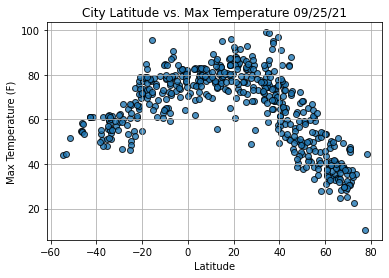

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

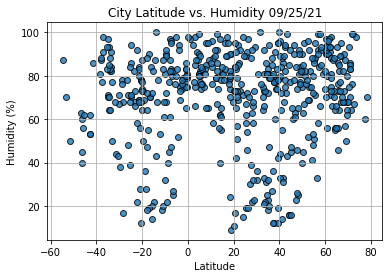

In [26]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

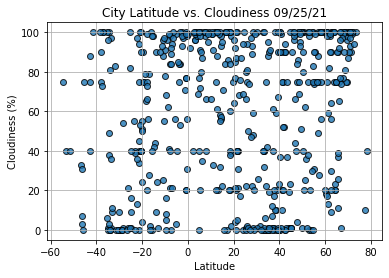

In [27]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

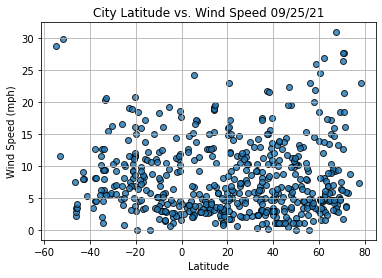

In [28]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                     Iracoubo
Country                        GF
Date          2021-09-22 22:45:32
Lat                        5.4802
Lng                      -53.2011
Max Temp                    80.83
Humidity                       82
Cloudiness                     72
Wind Speed                  11.01
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
526     True
527     True
528     True
529     True
530     True
Name: Lat, Length: 531, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Barrow,US,2021-09-22 22:45:02,71.2906,-156.7887,32.02,64,90,16.11
8,Kodiak,US,2021-09-22 22:45:31,57.7900,-152.4072,45.45,66,100,14.50
9,Bethel,US,2021-09-22 22:43:29,41.3712,-73.4140,76.05,86,75,1.01
12,Chokurdakh,RU,2021-09-22 22:45:31,70.6333,147.9167,30.78,70,93,1.74
13,Iracoubo,GF,2021-09-22 22:45:32,5.4802,-53.2011,80.83,82,72,11.01


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

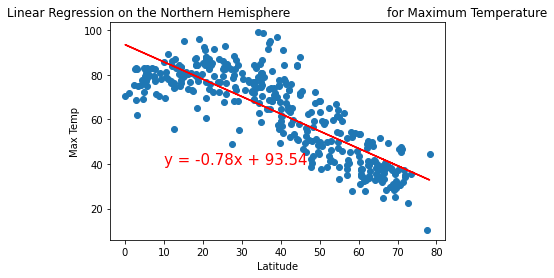

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

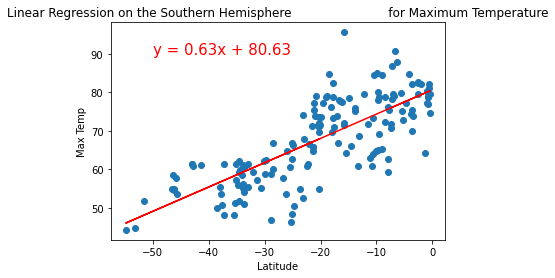

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

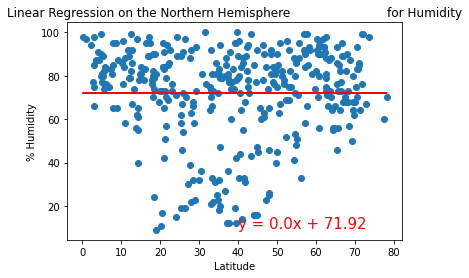

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', '% Humidity',(40,10))

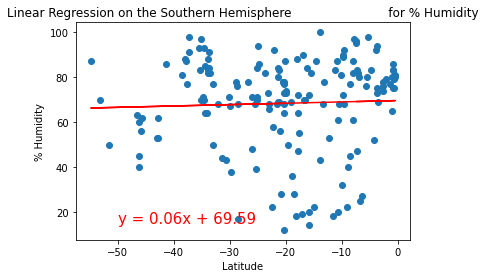

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Cloudiness', '% Cloudiness',(40,10))